<a href="https://colab.research.google.com/github/jyanivaddi/ERA_V1/blob/master/session_20/S20_StableDiffusion_modular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone "https://github.com/jyanivaddi/ERA_V1.git"
!git -C ERA_V1 pull

fatal: destination path 'ERA_V1' already exists and is not an empty directory.
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), 833 bytes | 833.00 KiB/s, done.
From https://github.com/jyanivaddi/ERA_V1
   96c0e8b..785da08  master     -> origin/master
Updating 96c0e8b..785da08
error: Your local changes to the following files would be overwritten by merge:
	session_20/stable_diffusion.py
Please commit your changes or stash them before you merge.
Aborting


In [ ]:
import os
import sys
sys.path.append('/content/ERA_V1/session_20')

In [ ]:
%pip install -qq -U datasets transformers pyarrow==9.0.0
%pip install -qq --upgrade transformers==4.25.1 diffusers ftfy accelerate


In [ ]:
%%capture
!sudo apt -qq install git-lfs
!git config --global credential.helper store

In [ ]:
import sys
import torch
sys.path.append('/content/ERA_V1/session_20/')
from stable_diffusion import StableDiffusion
from utils import invert_loss

In [ ]:
style_files = [ None,
               '/content/ERA_V1/session_20/learned_embeds_style_0.bin',
               '/content/ERA_V1/session_20/learned_embeds_style_10.bin',
               #'/content/ERA_V1/session_20/learned_embeds_style_2.bin',
               '/content/ERA_V1/session_20/learned_embeds_style_5.bin',
               '/content/ERA_V1/session_20/learned_embeds_style_8.bin']

torch_device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
stable_diffuser = StableDiffusion(torch_device, custom_loss_fn = invert_loss)

Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.11.self_attn.out_proj.bias', 'vision_model.encoder.layers.18.mlp.fc1.bias', 'vision_model.encoder.layers.23.self_attn.q_proj.weight', 'vision_model.encoder.layers.12.layer_norm2.weight', 'vision_model.encoder.layers.1.self_attn.k_proj.weight', 'vision_model.encoder.layers.10.self_attn.k_proj.bias', 'vision_model.encoder.layers.9.self_attn.v_proj.weight', 'vision_model.encoder.layers.18.layer_norm1.bias', 'vision_model.encoder.layers.1.mlp.fc2.bias', 'vision_model.encoder.layers.5.layer_norm1.weight', 'vision_model.encoder.layers.1.mlp.fc1.bias', 'vision_model.encoder.layers.9.layer_norm1.weight', 'vision_model.encoder.layers.13.self_attn.out_proj.weight', 'vision_model.encoder.layers.11.self_attn.k_proj.bias', 'vision_model.post_layernorm.bias', 'vision_model.encoder.layers.11.mlp.fc1.weight', 'vision_model.encoder.layers.7.layer_norm2.bias'

<ipython-input-11-edcdebd8c7d6>:60: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  (batch_size, unet.in_channels, height // 8, width // 8),


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

0 loss: 48.65065383911133
2 loss: 31.79674530029297
4 loss: 18.543785095214844
6 loss: 14.234113693237305
8 loss: 12.523481369018555
10 loss: 12.224507331848145
12 loss: 11.827970504760742
14 loss: 12.116922378540039
16 loss: 12.64342212677002
18 loss: 13.146265983581543
20 loss: 13.57125186920166
22 loss: 13.936649322509766
24 loss: 14.252617835998535
26 loss: 14.531068801879883
28 loss: 14.795231819152832


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

0 loss: 15.553953170776367
2 loss: 30.56728172302246
4 loss: 6.746777057647705
6 loss: 2.365431308746338
8 loss: 1.1865639686584473
10 loss: 2.8206841945648193
12 loss: 2.5293760299682617
14 loss: 2.6131021976470947
16 loss: 2.9295849800109863
18 loss: 2.1282503604888916
20 loss: 1.8933789730072021
22 loss: 1.830881118774414
24 loss: 1.8296452760696411
26 loss: 1.8032146692276
28 loss: 1.796420693397522


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

0 loss: 22.23670768737793
2 loss: 55.562313079833984
4 loss: 1.9448771476745605
6 loss: 5.356488227844238
8 loss: 2.1648848056793213
10 loss: 1.196248173713684
12 loss: 1.155228853225708
14 loss: 1.2137058973312378
16 loss: 1.2699464559555054
18 loss: 1.3003640174865723
20 loss: 1.3292365074157715
22 loss: 1.3683644533157349
24 loss: 1.4095100164413452
26 loss: 1.4494726657867432
28 loss: 1.494827151298523


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

0 loss: 9.977604866027832
2 loss: 27.130645751953125
4 loss: 14.8820219039917
6 loss: 1.0760022401809692
8 loss: 2.008214235305786
10 loss: 2.6011297702789307
12 loss: 1.8285386562347412
14 loss: 1.3647502660751343
16 loss: 1.464962124824524
18 loss: 1.7470108270645142
20 loss: 1.7462775707244873
22 loss: 1.6632318496704102
24 loss: 1.680773138999939
26 loss: 1.7511632442474365
28 loss: 1.8450312614440918


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

0 loss: 44.186519622802734
2 loss: 34.31378173828125
4 loss: 18.45901107788086
6 loss: 11.092607498168945
8 loss: 8.36926555633545
10 loss: 7.273187637329102
12 loss: 6.8735761642456055
14 loss: 6.7343339920043945
16 loss: 6.738980770111084
18 loss: 6.86281156539917
20 loss: 7.0556535720825195
22 loss: 7.254776477813721
24 loss: 7.456161022186279
26 loss: 7.6470136642456055
28 loss: 7.818297863006592


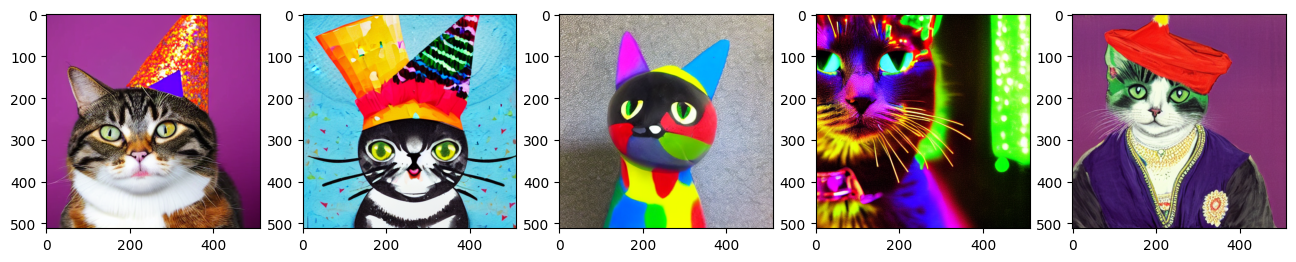

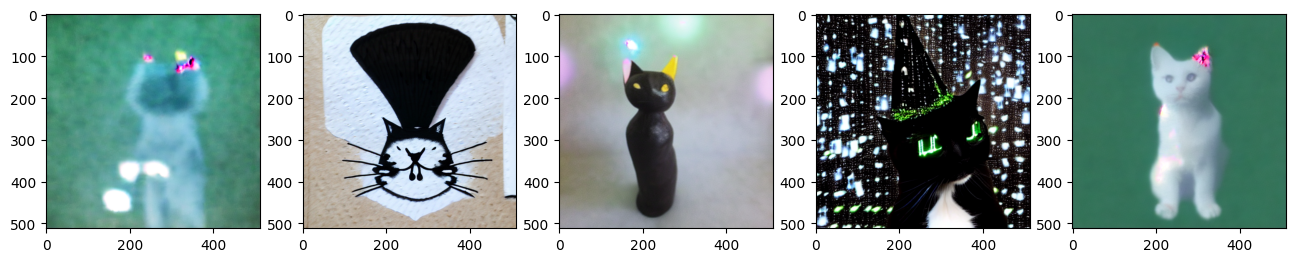

In [ ]:
outputs_1 = []
outputs_2 = []
seed_values = [1,2,3,4,5]
prompt = " A cat wearing a party hat vivid colors"
custom_loss = invert_loss
#custom_loss_fn = blue_loss
custom_loss_scale = 100.0
num_styles = len(style_files)
for cnt in range(num_styles):
    this_generated_img_1 = stable_diffuser.generate_image_with_custom_style(prompt,
                                                          style_num = cnt,
                                                          random_seed = seed_values[cnt],
                                                          custom_loss_fn = None,
                                                          custom_loss_scale = custom_loss_scale)
    outputs_1.append(this_generated_img_1)
    this_generated_img_2 = generate_image_with_custom_style(prompt,
                                                          style_num = cnt,
                                                          random_seed = seed_values[cnt],
                                                          custom_loss_fn = invert_loss,
                                                          custom_loss_scale = custom_loss_scale)
    outputs_2.append(this_generated_img_2)


show_images(outputs_1)
show_images(outputs_2)


